<a href="https://colab.research.google.com/github/Kanka-goswami/IISc_CDS_2302064/blob/main/Kanka_Copy_of_M2_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [238]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [239]:
#@title Download the data
#!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
#!unzip -qq Online_Retail.zip

## Load the data

In [240]:
df_test = pd.read_csv('/content/Online_Retail_Test.csv')
df_train = pd.read_csv('/content/Online_Retail_Train.csv')

In [241]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [242]:
num_cols = ['Quantity','UnitPrice']
cat_cols = ['InvoiceNo','StockCode','Description','CustomerID','Country']
date_cols = ['InvoiceDate']

In [243]:
df_train.shape

(514813, 8)

In [244]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [245]:
df_train.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
dtype: int64

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [246]:
# Handling Duplicates

In [247]:
def check_duplicates (X):
    '''Returns bool of duplicate rows
    '''
    duplicates = X.duplicated()
    return duplicates

In [248]:
dup_rows = check_duplicates(df_train)
dup_per_cent = (dup_rows.sum()/len(dup_rows))*100
print(f'Number of duplicate rows = {dup_rows.sum()}')
print(f'Percentage of douplicate rows = {round(dup_per_cent,4)} %')

Number of duplicate rows = 4754
Percentage of douplicate rows = 0.9234 %


In [249]:
# drop duplicates (dd)
df_dd_train = df_train.drop_duplicates()
# checking duplicates
dup_rows = check_duplicates(df_dd_train)
dup_per_cent = (dup_rows.sum()/len(dup_rows))*100
print(f'Number of duplicate rows = {dup_rows.sum()}')
print(f'Percentage of douplicate rows = {round(dup_per_cent,4)} %')

Number of duplicate rows = 0
Percentage of douplicate rows = 0.0 %


In [250]:
# Splitting in to three dataframes
df_train_cat = df_dd_train [cat_cols].copy()
df_train_num = df_dd_train [num_cols].copy()
df_train_date = df_dd_train [date_cols].copy()

In [251]:
# Handling invoice types

In [252]:
C_invoice = df_train['InvoiceNo'].str.contains('^C',regex=True)
A_invoice = df_train['InvoiceNo'].str.contains('^A', regex= True)
print(f'Cancelled transactions = {C_invoice.sum()}, Adjusted transactions = {A_invoice.sum()}')
df_train_cat[C_invoice]

Cancelled transactions = 8797, Adjusted transactions = 3


<ipython-input-252-524b9cdec16e>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_cat[C_invoice]


,InvoiceNo,StockCode,Description,CustomerID,Country
3,C571196,23350,ROLL WRAP VINTAGE SPOT,NaN,United Kingdom
34,C578367,22759,SET OF 3 NOTEBOOKS IN PARCEL,14640.0,United Kingdom
121,C573010,20979,36 PENCILS TUBE RED RETROSPOT,13735.0,United Kingdom
219,C570828,90059E,DIAMANTE HAIR GRIP PACK/2 RUBY,14911.0,EIRE
220,C563693,84050,PINK HEART SHAPE EGG FRYING PAN,17243.0,United Kingdom
...,...,...,...,...,...
514660,C574954,22720,SET OF 3 CAKE TINS PANTRY DESIGN,18223.0,United Kingdom
514692,C554029,22423,REGENCY CAKESTAND 3 TIER,12681.0,France
514696,C552805,21155,RED RETROSPOT PEG BAG,14149.0,United Kingdom
514700,C546870,M,Manual,14462.0,United Kingdom


In [253]:
df_train_cat[A_invoice]

<ipython-input-253-58db93556fbd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_cat[A_invoice]


,InvoiceNo,StockCode,Description,CustomerID,Country
51050,A563187,B,Adjust bad debt,NaN,United Kingdom
279008,A563185,B,Adjust bad debt,NaN,United Kingdom
405078,A563186,B,Adjust bad debt,NaN,United Kingdom


In [254]:
import regex as re
def invoiceLabeler (s):
    p1= re.compile('^c',re.IGNORECASE)
    p2= re.compile('^a',re.IGNORECASE)
    if re.search(p1,s):
        return 1
    if re.search(p2,s):
        return 2
    return 0


In [255]:
labels = df_train_cat['InvoiceNo'].apply(lambda x: invoiceLabeler(x))

In [256]:
from sklearn.base import BaseEstimator, TransformerMixin
class customInvoiceEncoder (BaseEstimator, TransformerMixin):
    def fit(self, X, y= None):
        return self

    def transform(self,X,y=None):
        X['Invoice_cat'] = X['InvoiceNo'].apply(lambda x: invoiceLabeler(x))
        return X

In [257]:
from sklearn.pipeline import Pipeline
cat_pipe = Pipeline(
    steps=[
        ("use_custom_transformer", customInvoiceEncoder()) , # Returns dataframe
        ]
)
transformed_df = cat_pipe.fit_transform(df_train)
new_cols = transformed_df.columns
transformed_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,0
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,0
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom,1
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3,2011-03-06 11:39:00,1.25,14701.0,United Kingdom,0
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12,2011-07-11 15:52:00,2.95,13089.0,United Kingdom,0
514810,568716,22150,3 STRIPEY MICE FELTCRAFT,1,2011-09-28 16:13:00,4.13,NaN,United Kingdom,0
514811,547651,22293,HANGING CHICK GREEN DECORATION,1,2011-03-24 12:11:00,1.45,16904.0,United Kingdom,0


In [258]:
transformed_df['Invoice_cat'].unique()

array([0, 1, 2])

In [259]:
transformed_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,0
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,0
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom,1
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom,0
...,...,...,...,...,...,...,...,...,...
514808,545682,22975,SPACEBOY CHILDRENS EGG CUP,3,2011-03-06 11:39:00,1.25,14701.0,United Kingdom,0
514809,559691,22089,PAPER BUNTING VINTAGE PAISLEY,12,2011-07-11 15:52:00,2.95,13089.0,United Kingdom,0
514810,568716,22150,3 STRIPEY MICE FELTCRAFT,1,2011-09-28 16:13:00,4.13,NaN,United Kingdom,0
514811,547651,22293,HANGING CHICK GREEN DECORATION,1,2011-03-24 12:11:00,1.45,16904.0,United Kingdom,0


In [260]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514813 non-null  object 
 1   StockCode    514813 non-null  object 
 2   Description  513428 non-null  object 
 3   Quantity     514813 non-null  int64  
 4   InvoiceDate  514813 non-null  object 
 5   UnitPrice    514813 non-null  float64
 6   CustomerID   386550 non-null  float64
 7   Country      514813 non-null  object 
 8   Invoice_cat  514813 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 35.3+ MB


In [261]:
# Handling null values

In [262]:
df_train.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128263
Country             0
Invoice_cat         0
dtype: int64

In [263]:
from sklearn.impute import SimpleImputer
class PandasSimpleImputer(SimpleImputer):
    """A wrapper around `SimpleImputer` to return data frames with columns.
    """

    def fit(self, X, y=None):
        self.columns = X.columns
        return super().fit(X, y)

    def transform(self, X):
        return pd.DataFrame(super().transform(X), columns=self.columns)

In [264]:

data_pipe = Pipeline(
    steps=[

        ("use_custom_transformer", customInvoiceEncoder()), # return dataframe
        ("imputer", PandasSimpleImputer(strategy= "most_frequent")) # returns dataframe
        ]
)

In [265]:
transformed_df1 = data_pipe.fit_transform(df_train)

In [266]:
transformed_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514813 entries, 0 to 514812
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   InvoiceNo    514813 non-null  object
 1   StockCode    514813 non-null  object
 2   Description  514813 non-null  object
 3   Quantity     514813 non-null  object
 4   InvoiceDate  514813 non-null  object
 5   UnitPrice    514813 non-null  object
 6   CustomerID   514813 non-null  object
 7   Country      514813 non-null  object
 8   Invoice_cat  514813 non-null  object
dtypes: object(9)
memory usage: 35.3+ MB


In [267]:
transformed_df1['Invoice_cat'].unique()

array([0, 1, 2], dtype=object)

In [268]:
transformed_df1[transformed_df1['Invoice_cat']==2].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat
51050,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,17841.0,United Kingdom,2
279008,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,17841.0,United Kingdom,2


In [269]:
# Handling irrelevant rows

In [270]:
class irrelevantRows (BaseEstimator,TransformerMixin):
    def fit (self, X, y=None):
        return self
    def transform (self, X, y=None):
        X['Quantity']=X['Quantity'].astype(np.float32)
        X['UnitPrice']=X['UnitPrice'].astype(np.float32)
        entries = ['POST','PADS','M','DOT','C2','BANK CHARGES']
        irr_loc = set()    # irrelevant indices
        for entry in entries:
            idx = X[X['StockCode']== entry].index.values
            irr_loc.update(idx)
        irr_loc.update(X[X['Quantity']<0].index.values)
        irr_loc.update(X[X['UnitPrice']<0].index.values)
        X = X.drop(index=irr_loc)
        return X

In [271]:
other_pipe = Pipeline(
    steps=[

        ("dropRows", irrelevantRows()), # returns dataframe
        ]
)
transformed_df2 = other_pipe.fit_transform(transformed_df1)

In [272]:
transformed_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502522 entries, 0 to 514812
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    502522 non-null  object 
 1   StockCode    502522 non-null  object 
 2   Description  502522 non-null  object 
 3   Quantity     502522 non-null  float32
 4   InvoiceDate  502522 non-null  object 
 5   UnitPrice    502522 non-null  float32
 6   CustomerID   502522 non-null  object 
 7   Country      502522 non-null  object 
 8   Invoice_cat  502522 non-null  object 
dtypes: float32(2), object(7)
memory usage: 34.5+ MB


In [273]:
transformed_df2[transformed_df2['Quantity']<0].head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat


In [274]:
transformed_df2[transformed_df2['StockCode']== 'POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat


In [275]:
# Handling outliers

In [276]:
transformed_df2[['UnitPrice','Quantity']].describe()

,UnitPrice,Quantity
count,502522.000000,502522.000000
mean,3.282085,10.694622
std,16.212898,160.958694
min,0.000000,1.000000
25%,1.250000,1.000000
50%,2.080000,3.000000
75%,4.130000,11.000000
max,11062.059570,80995.000000


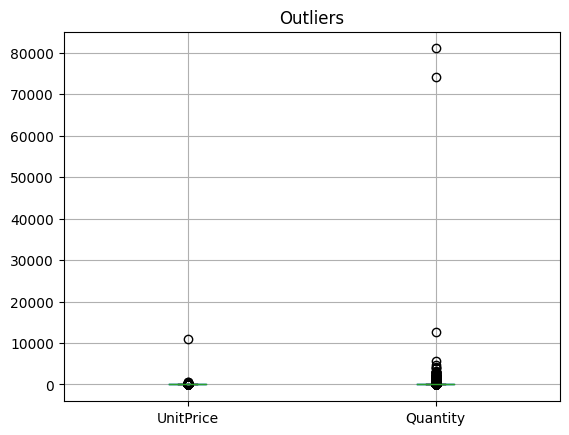

In [277]:
transformed_df2[['UnitPrice','Quantity']].boxplot()
plt.title('Outliers')
plt.show()

In [278]:

def outlierCapper (X,columns= None):
    '''Caps the outlier values to upper and lower bounds
    for the columns passed and returns the dataframe.
    '''
    for col in columns:
        n = X.shape[0]
        # quartiles
        q3 = X.describe()[col].loc['75%']
        q1 = X.describe()[col].loc['25%']
        # inter-quartile range
        iqr = q3 - q1
        # capping values
        cap_right = q3 + (1.5 * iqr)
        cap_left = q1 - (1.5 * iqr)
        # capping process
        for i in range (n):
            if X[col].iloc[i] > cap_right:
                X[col].iloc[i] = int(cap_right)
            if X[col].iloc[i] < cap_left:
                X[col].iloc[i] = int(cap_left)
    return X

In [279]:
from sklearn.preprocessing import FunctionTransformer

In [280]:
outlier_pipe = Pipeline(
    steps=[

        ("outliersCap", FunctionTransformer(outlierCapper,
                                            kw_args={"columns":['UnitPrice','Quantity']})), # returns dataframe

        ]
)
transformed_df3 = outlier_pipe.fit_transform(transformed_df2)

Streaming output truncated to the last 5000 lines.
<ipython-input-278-629319160318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].iloc[i] = int(cap_right)
<ipython-input-278-629319160318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].iloc[i] = int(cap_right)
<ipython-input-278-629319160318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].iloc[i] = int(cap_right)
<ipython-input-278-629319160318>:18: Settin

In [281]:

transformed_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502522 entries, 0 to 514812
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    502522 non-null  object 
 1   StockCode    502522 non-null  object 
 2   Description  502522 non-null  object 
 3   Quantity     502522 non-null  float32
 4   InvoiceDate  502522 non-null  object 
 5   UnitPrice    502522 non-null  float32
 6   CustomerID   502522 non-null  object 
 7   Country      502522 non-null  object 
 8   Invoice_cat  502522 non-null  object 
dtypes: float32(2), object(7)
memory usage: 34.5+ MB


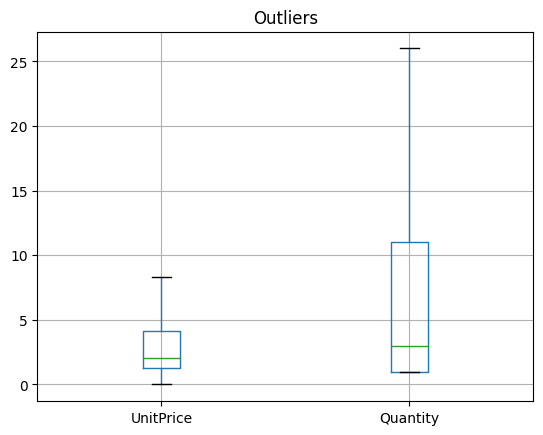

In [282]:
transformed_df3[['UnitPrice','Quantity']].boxplot()
plt.title('Outliers')
plt.show()

In [283]:
# Date time columns

In [284]:
idx = transformed_df3.index.to_list()
df_new = df_train.loc[idx].copy()
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,0
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,0
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom,0
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,0


In [285]:
def dt_Fet_Extract (X,y=None,columns=None):
    '''Returns extracted datetime features'''
    new_X = pd.DataFrame()
    for col in columns:
        dt = pd.to_datetime(X[col]).dt
        new_X['date'] = dt.date
        new_X['hour'] = dt.hour
        new_X['min'] = dt.minute
        new_X['month'] = dt.month
        new_X['day'] = dt.day_of_week
    return pd.concat([X,new_X],axis=1)

In [286]:
outlier_pipe = Pipeline(
    steps=[

        ("outliersCap", FunctionTransformer(dt_Fet_Extract,
                                            kw_args={"columns":['InvoiceDate']})), # returns dataframe

        ]
)
transformed_df4 = outlier_pipe.fit_transform(transformed_df3)

In [287]:
transformed_df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat,date,hour,min,month,day
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-11-29 13:04:00,8.00,16479.0,United Kingdom,0,2011-11-29,13,4,11,1
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24.0,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,0,2011-05-22,12,41,5,6
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6.0,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0,2011-11-21,15,57,11,0
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1.0,2011-03-15 14:17:00,7.46,17841.0,United Kingdom,0,2011-03-15,14,17,3,1
5,579668,23575,SNACK TRAY PAISLEY PARK,8.0,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,0,2011-11-30,12,32,11,2


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [288]:
# Free items

In [289]:
pp_df = transformed_df4.copy()

In [290]:
free_item_idx = pp_df[pp_df['UnitPrice'] == 0].index.tolist()

In [291]:
print('Number of Free items: ', len(free_item_idx))

Number of Free items:  1099


In [292]:
# Countrywise transactions

In [293]:
pp_df['Country'].value_counts()

Country
United Kingdom          461007
Germany                   8194
France                    7681
EIRE                      7373
Spain                     2299
Netherlands               2194
Belgium                   1848
Switzerland               1848
Portugal                  1384
Australia                 1132
Norway                    1003
Channel Islands            707
Italy                      702
Finland                    618
Cyprus                     581
Unspecified                424
Sweden                     407
Austria                    366
Denmark                    351
Poland                     311
Japan                      304
Israel                     282
Hong Kong                  268
Singapore                  203
Iceland                    171
USA                        166
Canada                     141
Greece                     133
Malta                      103
United Arab Emirates        62
RSA                         54
European Community          53


Text(0.5, 1.0, 'Countrywise transactions')

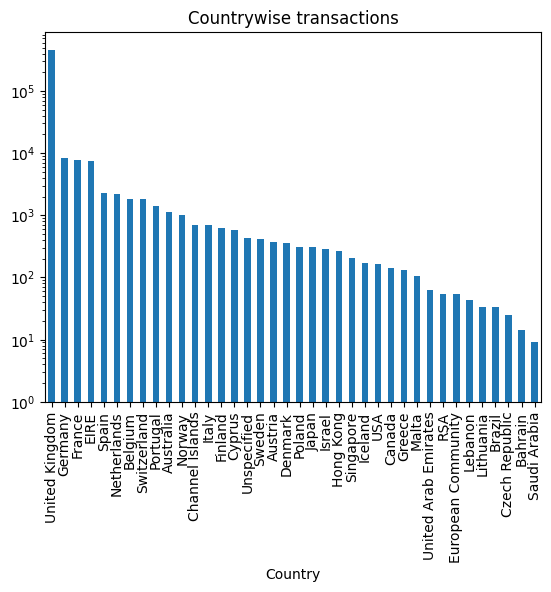

In [294]:
pp_df['Country'].value_counts().plot(kind='bar',log=True)
plt.title('Countrywise transactions')

In [295]:
# Repeated orders

In [296]:
customers = df_train['CustomerID'].unique()
total_customers=len(customers)
total_transactions = len(df_train['CustomerID'])
missing_vals = df_train['CustomerID'].isnull().sum()
repeat_customers = total_transactions - missing_vals - total_customers
repeat = [repeat_customers,(missing_vals+total_customers)]
per_cent_repeat = repeat / sum(repeat)
print(per_cent_repeat)

[0.74237053 0.25762947]


<BarContainer object of 2 artists>

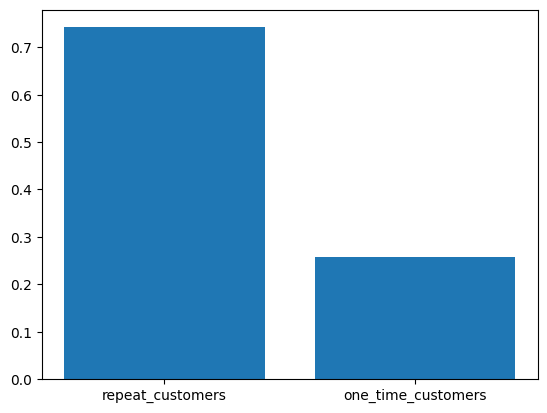

In [297]:
plt.bar(['repeat_customers', 'one_time_customers'],per_cent_repeat)

In [298]:
# heat map vs

## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [299]:
def spendingFet (X, y= None, columns= None):
    X['TotalSpending'] = X[columns[0]]*X[columns[1]]
    return X

In [300]:
def CustomSinCosEncoder (X,y=None,columns= None):
    for col in columns:
        max_val = len(X[col].unique())
        X[col + '_sin'] = np.sin(2 * np.pi * X[col] /max_val)
        X[col + '_cos'] = np.cos(2 * np.pi * X[col] /max_val)
    return X

In [301]:
fet_engg_pipe_1 = Pipeline(
    steps=[

        ("totalSpending", FunctionTransformer(spendingFet,
                                            kw_args={"columns":['Quantity','UnitPrice']})), # returns dataframe

        ]
)
transformed_df5 = fet_engg_pipe_1.fit_transform(pp_df)

In [302]:
transformed_df5.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_cat,date,hour,min,month,day,TotalSpending
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2.0,2011-11-29 13:04:00,8.00,16479.0,United Kingdom,0,2011-11-29,13,4,11,1,16.00
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24.0,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,0,2011-05-22,12,41,5,6,10.08
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6.0,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,0,2011-11-21,15,57,11,0,2.52
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1.0,2011-03-15 14:17:00,7.46,17841.0,United Kingdom,0,2011-03-15,14,17,3,1,7.46
5,579668,23575,SNACK TRAY PAISLEY PARK,8.0,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,0,2011-11-30,12,32,11,2,15.60


In [303]:
def aggregation_func(X,y=None,columns=None):
    agg_func_dict = {'Quantity': 'sum','TotalSpending': 'sum',
                    'month':'median','day':'median','hour':'median','min':'median'
                    }
    agg_df = X.groupby('CustomerID').agg(agg_func_dict)
    return agg_df

In [304]:
fet_engg_pipe_2 = Pipeline(
    steps=[
        ("aggregation", FunctionTransformer(aggregation_func)), #returns dataframe
        ("sincosencoder", FunctionTransformer(CustomSinCosEncoder,
                                            kw_args={"columns":['month','day','hour','min']})), # return dataframe

        ]
)
transformed_df6 = fet_engg_pipe_2.fit_transform(transformed_df5)

In [305]:
transformed_df6.reset_index().head()

,CustomerID,Quantity,TotalSpending,month,day,hour,min,month_sin,month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos
0,12346.0,26.0,27.039999,1.0,1.0,10.0,1.0,0.269797,0.962917,0.500000,8.660254e-01,0.281733,-0.959493,0.066091,0.997814
1,12347.0,2052.0,3664.310059,8.0,1.0,12.0,30.0,0.816970,-0.576680,0.500000,8.660254e-01,-0.281733,-0.959493,0.915773,-0.401695
2,12348.0,660.0,467.720001,12.0,3.0,19.0,9.0,-0.136167,-0.990686,1.000000,6.123234e-17,-0.755750,0.654861,0.560715,0.828009
3,12349.0,590.0,1247.010010,11.0,0.0,9.0,51.0,0.136167,-0.990686,0.000000,1.000000e+00,0.540641,-0.841254,-0.229424,-0.973327
4,12350.0,196.0,294.399994,2.0,2.0,16.0,1.0,0.519584,0.854419,0.866025,5.000000e-01,-0.989821,-0.142315,0.066091,0.997814


In [306]:
transformed_df6 = transformed_df6.drop(columns= ['month','day','hour','min'])

In [307]:
transformed_df6 = transformed_df6.drop(columns= ['month_sin','month_cos',
                                                 #'day_sin','day_cos',
                                                 'hour_sin','hour_cos',
                                                 'min_sin','min_cos',
                                                 ])

In [308]:
transformed_df6.head()

,Quantity,TotalSpending,day_sin,day_cos
CustomerID,,,,
12346.0,26.0,27.039999,0.500000,8.660254e-01
12347.0,2052.0,3664.310059,0.500000,8.660254e-01
12348.0,660.0,467.720001,1.000000,6.123234e-17
12349.0,590.0,1247.010010,0.000000,1.000000e+00
12350.0,196.0,294.399994,0.866025,5.000000e-01


### Scale the data

Apply `StandardScaler` on the features.

In [309]:
scaling_pipe = Pipeline(
    steps=[
        ('scaling',StandardScaler())
    ]
)
scaled_df = scaling_pipe.fit_transform(transformed_df6)

In [310]:
scaled_df

array([[-0.13052148, -0.08670419, -0.36333534,  1.05570278],
       [ 0.21073246,  0.11844259, -0.36333534,  1.05570278],
       [-0.02373224, -0.06184926,  0.93258134, -0.30863021],
       ...,
       [-0.1215943 , -0.08037991,  0.58534151, -1.09632823],
       [ 0.08844699,  0.02271885,  0.93258134, -0.30863021],
       [ 0.07800388, -0.00505315,  0.58534151,  0.47906781]])

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

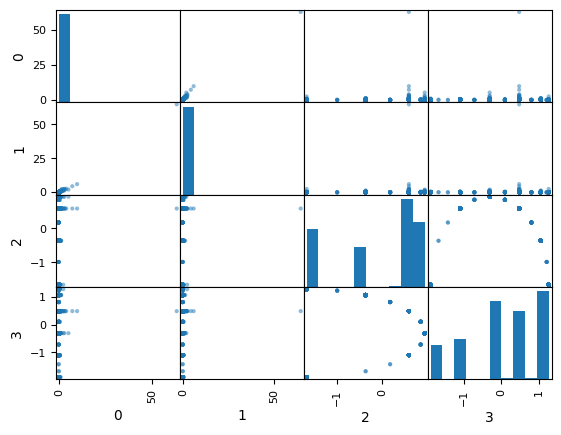

In [311]:
# Visualization
from pandas.plotting import scatter_matrix
scatter_matrix(pd.DataFrame(scaled_df))

## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [312]:
# YOUR CODE HERE to apply KMeans

In [313]:
# initial cluster guess
k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++')
y_pred = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [314]:
print(np.unique(y_pred))

[0 1 2 3 4]


In [315]:
kmeans.cluster_centers_

array([[ 2.02546806e-02,  8.09559530e-03,  1.85944286e-01,
         7.22477467e-01],
       [-6.34078022e-02, -4.58210651e-02, -1.65386359e+00,
        -1.88314865e+00],
       [-6.52424626e-02, -4.67827896e-02, -1.65289959e+00,
         1.26625749e+00],
       [ 6.30162799e+01,  6.46937872e+01,  5.85341511e-01,
         4.79067808e-01],
       [-1.88454453e-02, -1.87310824e-02,  8.13791875e-01,
        -5.71817477e-01]])

<ipython-input-316-c91ca9db832c>:9: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(df[label == i , 0] ), np.log(df[label == i , 1]) , label = i, alpha = 0.5)


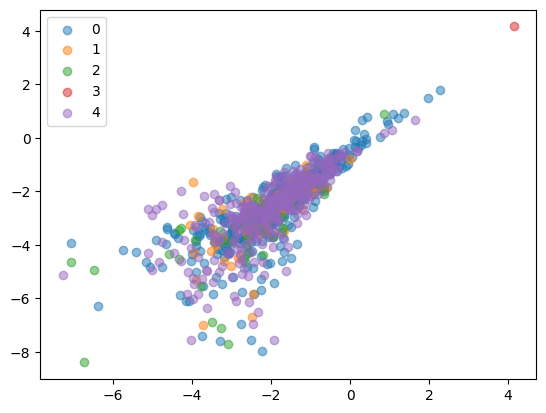

In [316]:
#Getting unique labels
label = y_pred
df = scaled_df
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(np.log(df[label == i , 0] ), np.log(df[label == i , 1]) , label = i, alpha = 0.5)
plt.legend()
plt.show()

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

In [317]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [318]:
# Using the Elbow method to find the optimal no.of clusters
X = scaled_df
inertia = []
clusters, centroids = {}, {}

for i in range(2,15):
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    clusters[i] = kmeans.fit_predict(X)
    centroids[i] = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)

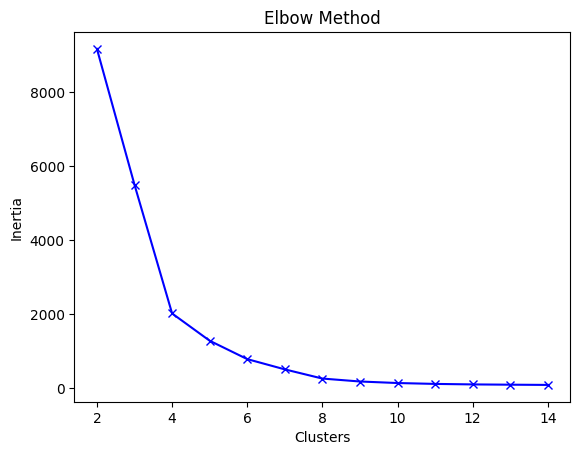

In [319]:
# plot the clusters vs inertia
plt.plot(range(2,15) , inertia,'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

In [320]:
# k means determine k
X = scaled_df
silhouette_avg = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeanModel.fit(X)
    silhouette_avg.append(silhouette_score(X, kmeanModel.predict(X)))



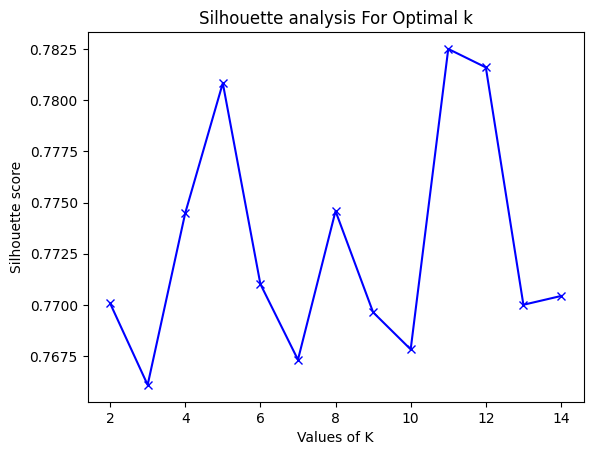

In [321]:
# Plot Silhoutte
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [322]:
# elbow method suggest 6 clusters
k =6
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [323]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5], dtype=int32)

<ipython-input-324-c60b92be6f31>:9: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(df[label == i , 0]) , np.log(df[label == i , 1]) , label = i,


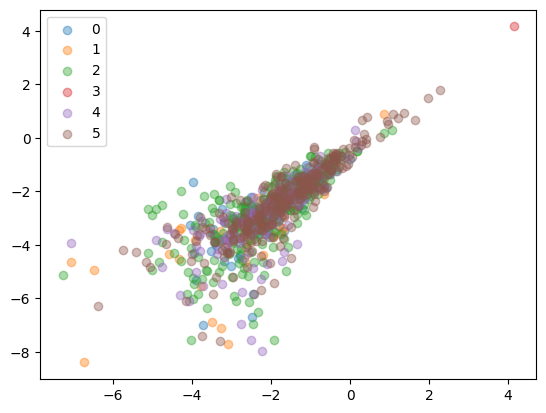

In [324]:
#Getting unique labels
label = y_pred
df = scaled_df
u_labels = np.unique(label)

#plotting the results:

for i in u_labels:
    plt.scatter(np.log(df[label == i , 0]) , np.log(df[label == i , 1]) , label = i,
                alpha=0.4)
plt.legend()
plt.show()

### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [325]:
scaled_df.shape

(4333, 4)

In [326]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples = 0.01)
optics.fit(scaled_df)
optics_clusters = optics.labels_

In [327]:
print(np.unique(optics_clusters))

[-1  0  1  2  3  4  5]


In [328]:
optics.cluster_hierarchy_

array([[   0,  450],
       [   0,  544],
       [   0,  685],
       [ 815,  931],
       [ 687, 1618],
       [1619, 2722],
       [2725, 3002],
       [2725, 3106],
       [2725, 3193],
       [2725, 3285],
       [ 687, 3285],
       [3315, 3550],
       [3315, 3836],
       [   0, 3841],
       [3898, 3997],
       [3845, 4323],
       [   0, 4332]])

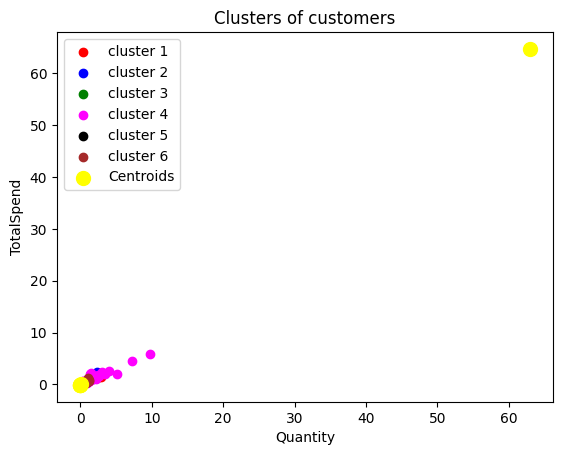

In [329]:
# Optimal cluster at 6, so choosing centroids
centroids_optimal = centroids[6]
clusters_optimal = clusters[6]

#plotting the results:
# Visualising the clusters considering Unit Price and Quantity
plt.scatter(X[clusters_optimal == 0, 0], X[clusters_optimal == 0, 1], c = 'red', label = 'cluster 1')
plt.scatter(X[clusters_optimal == 1, 0], X[clusters_optimal == 1, 1], c = 'blue', label = 'cluster 2')
plt.scatter(X[clusters_optimal == 2, 0], X[clusters_optimal == 2, 1], c = 'green', label = 'cluster 3')
plt.scatter(X[clusters_optimal == 3, 0], X[clusters_optimal == 3, 1], c = 'magenta', label = 'cluster 4')
plt.scatter(X[clusters_optimal == 4, 0], X[clusters_optimal == 4, 1], c = 'k', label = 'cluster 5')
plt.scatter(X[clusters_optimal == 5, 0], X[clusters_optimal == 5, 1], c = 'brown', label = 'cluster 6')
plt.scatter(centroids_optimal[:, 0], centroids_optimal[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Quantity')
plt.ylabel('TotalSpend')
plt.legend()
plt.show()

### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

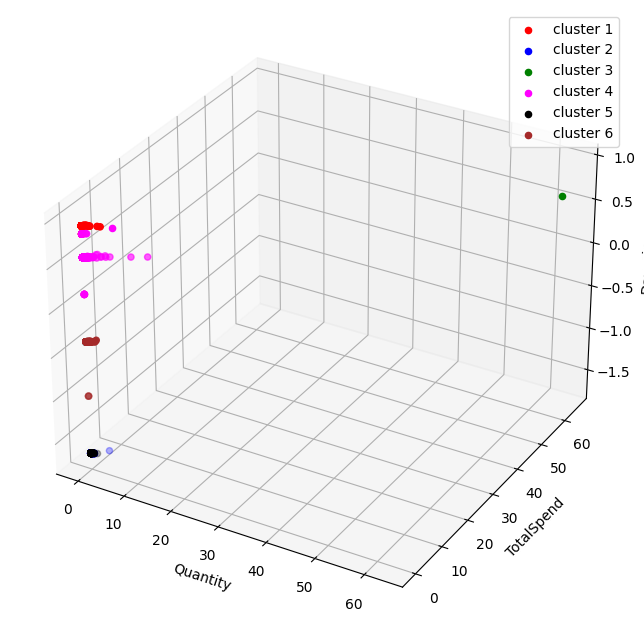

In [330]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X[clusters_optimal == 0, 0], X[clusters_optimal == 0, 1], X[clusters_optimal == 0, 2], c = 'red', label = 'cluster 1')
ax.scatter(X[clusters_optimal == 1, 0], X[clusters_optimal == 1, 1], X[clusters_optimal == 1, 2], c = 'blue', label = 'cluster 2')
ax.scatter(X[clusters_optimal == 2, 0], X[clusters_optimal == 2, 1], X[clusters_optimal == 2, 2], c = 'green', label = 'cluster 3')
ax.scatter(X[clusters_optimal == 3, 0], X[clusters_optimal == 3, 1], X[clusters_optimal == 3, 2], c = 'magenta', label = 'cluster 4')
ax.scatter(X[clusters_optimal == 4, 0], X[clusters_optimal == 4, 1], X[clusters_optimal == 4, 2], c = 'k', label = 'cluster 5')
ax.scatter(X[clusters_optimal == 5, 0], X[clusters_optimal == 5, 1], X[clusters_optimal == 5, 2], c = 'brown', label = 'cluster 6')
ax.set_xlabel("Quantity")
ax.set_ylabel("TotalSpend")
ax.set_zlabel("Day_sin")
ax.legend()
plt.show()

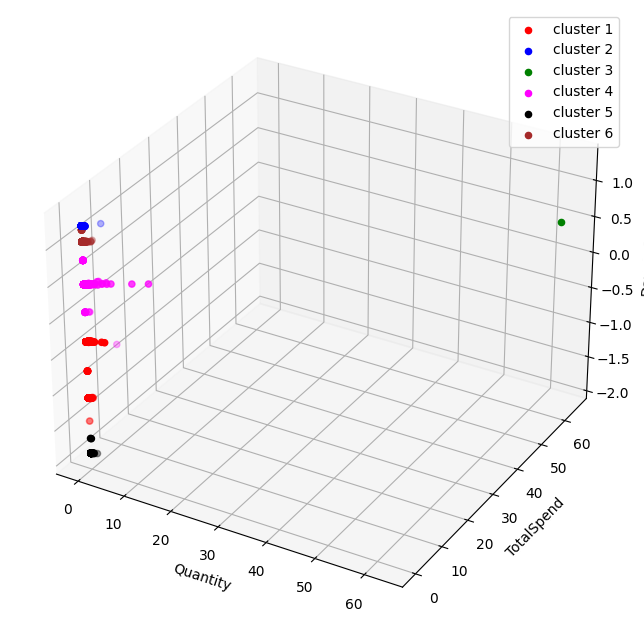

In [331]:
# Visualising all the clusters in 3D using `TotalSpend`, `Quantity`, `DayOfWeek_cos`

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.scatter(X[clusters_optimal == 0, 0], X[clusters_optimal == 0, 1], X[clusters_optimal == 0, 3], c = 'red', label = 'cluster 1')
ax.scatter(X[clusters_optimal == 1, 0], X[clusters_optimal == 1, 1], X[clusters_optimal == 1, 3], c = 'blue', label = 'cluster 2')
ax.scatter(X[clusters_optimal == 2, 0], X[clusters_optimal == 2, 1], X[clusters_optimal == 2, 3], c = 'green', label = 'cluster 3')
ax.scatter(X[clusters_optimal == 3, 0], X[clusters_optimal == 3, 1], X[clusters_optimal == 3, 3], c = 'magenta', label = 'cluster 4')
ax.scatter(X[clusters_optimal == 4, 0], X[clusters_optimal == 4, 1], X[clusters_optimal == 4, 3], c = 'k', label = 'cluster 5')
ax.scatter(X[clusters_optimal == 5, 0], X[clusters_optimal == 5, 1], X[clusters_optimal == 5, 3], c = 'brown', label = 'cluster 6')
ax.set_xlabel("Quantity")
ax.set_ylabel("TotalSpend")
ax.set_zlabel("Day_cos")
ax.legend()
plt.show()

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [332]:
transformed_df6['Label'] = clusters[6]
transformed_df6.head(3)

,Quantity,TotalSpending,day_sin,day_cos,Label
CustomerID,,,,,
12346.0,26.0,27.039999,0.5,8.660254e-01,5
12347.0,2052.0,3664.310059,0.5,8.660254e-01,5
12348.0,660.0,467.720001,1.0,6.123234e-17,0


In [351]:
features = transformed_df6.iloc[:,0:-1]
labels = transformed_df6.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3249, 4), (1084, 4), (3249,), (1084,))

In [352]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

1.0

In [353]:
#

### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [354]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [355]:
# Data pipelines
data_pipe = Pipeline(
    steps=[
        ("use_custom_transformer", customInvoiceEncoder()) , # Returns dataframe
	("imputer", PandasSimpleImputer(strategy= "most_frequent",)), # returns np.array
	("dropRows", irrelevantRows()), # returns dataframe
	("outliersCap", FunctionTransformer(outlierCapper,
                                            kw_args={"columns":['UnitPrice','Quantity']})), # returns dataframe
	("datetimeextract", FunctionTransformer(dt_Fet_Extract,
                                            kw_args={"columns":['InvoiceDate']})), # returns dataframe
        ]
)

In [356]:
t_test = data_pipe.fit_transform(test)

Streaming output truncated to the last 5000 lines.
<ipython-input-278-629319160318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].iloc[i] = int(cap_right)
<ipython-input-278-629319160318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].iloc[i] = int(cap_right)
<ipython-input-278-629319160318>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].iloc[i] = int(cap_right)
<ipython-input-278-629319160318>:18: Settin

In [357]:
# Feature pipeline
feature_engg_pipe = Pipeline(
	steps=[
		("totalSpending", FunctionTransformer(spendingFet,
                                            kw_args={"columns":['Quantity','UnitPrice']})), # returns dataframe
		("aggregation", FunctionTransformer(aggregation_func)), #returns dataframe
		("sincosencoder", FunctionTransformer(CustomSinCosEncoder,
                                            kw_args={"columns":['month','day','hour','min']})), # return dataframe
        ("dropcolumns", FunctionTransformer(pd.DataFrame.drop,
                                            kw_args={"columns":['month','day','hour','min',
                                                    'month_sin','month_cos',
                                                    #'day_sin','day_cos',
                                                    'hour_sin','hour_cos',
                                                    'min_sin','min_cos',] })) #returns dataframe
		]
)

In [358]:
t_agg_test = feature_engg_pipe.fit_transform(transformed_test)

In [359]:
t_agg_test.head()

,Quantity,TotalSpending,day_sin,day_cos
CustomerID,,,,
12347.0,105.0,217.649994,0.866025,5.000000e-01
12348.0,23.0,6.670000,0.500000,8.660254e-01
12349.0,20.0,103.139999,0.000000,1.000000e+00
12353.0,6.0,48.000000,1.000000,6.123234e-17
12354.0,13.0,32.400002,1.000000,6.123234e-17


In [379]:
test = t_agg_test.iloc[:,0:]
print(test.columns)
test_features = pd.DataFrame(scaling_pipe.transform(test), columns=test.columns)
y_pred=rf.predict(test_features)
print(y_pred)
#custID_test = [test.index.values]
#y_true = transformed_df6['Label']
#print(type(y_true.loc[custID_test].values))
#rf.score(y_pred, [y_true.loc[custID_test].values])

Index(['Quantity', 'TotalSpending', 'day_sin', 'day_cos'], dtype='object')
[5 1 1 ... 4 0 4]


### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?